<a href="https://colab.research.google.com/github/DavidTitoInfantas/ifood/blob/main/Analise_data_Ifood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analise to data ifood

##Uploading and explory data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ifood/ifood-data-business-analyst-test/master/ml_project1_data.csv')

In [ ]:
df.rename(columns={"AcceptedCmp3":"Campanha_3","AcceptedCmp4":"Campanha_4","AcceptedCmp5":"Campanha_5","AcceptedCmp1":"Campanha_1","AcceptedCmp2":"Campanha_2"},inplace=True)

In [ ]:
print('-'*20, 'General information data of the data frame', '-'*20, '\n')
print('side of Data Frame = {}'.format(df.shape),'\n')
print('head of columns = {}'.format(df.columns.values))

print('-'*20, 'Information of type for column', '-'*20, '\n')
print(df.info())

-------------------- General information data of the data frame -------------------- 

side of Data Frame = (2240, 29) 

head of columns = ['ID' 'Year_Birth' 'Education' 'Marital_Status' 'Income' 'Kidhome'
 'Teenhome' 'Dt_Customer' 'Recency' 'MntWines' 'MntFruits'
 'MntMeatProducts' 'MntFishProducts' 'MntSweetProducts' 'MntGoldProds'
 'NumDealsPurchases' 'NumWebPurchases' 'NumCatalogPurchases'
 'NumStorePurchases' 'NumWebVisitsMonth' 'Campanha_3' 'Campanha_4'
 'Campanha_5' 'Campanha_1' 'Campanha_2' 'Complain' 'Z_CostContact'
 'Z_Revenue' 'Response']
-------------------- Information of type for column -------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital


##Analise columns with nulls

In [ ]:
df.isnull().sum()/df.count()

ID                     0.00000
Year_Birth             0.00000
Education              0.00000
Marital_Status         0.00000
Income                 0.01083
Kidhome                0.00000
Teenhome               0.00000
Dt_Customer            0.00000
Recency                0.00000
MntWines               0.00000
MntFruits              0.00000
MntMeatProducts        0.00000
MntFishProducts        0.00000
MntSweetProducts       0.00000
MntGoldProds           0.00000
NumDealsPurchases      0.00000
NumWebPurchases        0.00000
NumCatalogPurchases    0.00000
NumStorePurchases      0.00000
NumWebVisitsMonth      0.00000
Campanha_3             0.00000
Campanha_4             0.00000
Campanha_5             0.00000
Campanha_1             0.00000
Campanha_2             0.00000
Complain               0.00000
Z_CostContact          0.00000
Z_Revenue              0.00000
Response               0.00000
dtype: float64

####Change the NA for Icome's median 

In [ ]:
##df['Income'].median()
df['Income'].fillna(df['Income'].median(),inplace=True)

###Filtro de DF con 1 variable por canal de venta

In [ ]:
LF = df[(df['NumStorePurchases']>0)&(df['NumCatalogPurchases']==0)&(df['NumWebPurchases']==0)]
CT = df[(df['NumStorePurchases']==0)&(df['NumCatalogPurchases']>0)&(df['NumWebPurchases']==0)]
ST = df[(df['NumStorePurchases']==0)&(df['NumCatalogPurchases']==0)&(df['NumWebPurchases']>0)]
LF_CT = df[(df['NumStorePurchases']>0)&(df['NumCatalogPurchases']>0)&(df['NumWebPurchases']==0)]
LF_ST = df[(df['NumStorePurchases']>0)&(df['NumCatalogPurchases']==0)&(df['NumWebPurchases']>0)]
CT_ST = df[(df['NumStorePurchases']==0)&(df['NumCatalogPurchases']>0)&(df['NumWebPurchases']>0)]
LF_CT_ST = df[(df['NumStorePurchases']>0)&(df['NumCatalogPurchases']>0)&(df['NumWebPurchases']>0)]
NA = df[(df['NumStorePurchases']==0)&(df['NumCatalogPurchases']==0)&(df['NumWebPurchases']==0)]
##index = LF.index
##print(len(index))
print('='*15,'Filtro de DF con 1 variable','='*15,'\n')
print('Persoas que compraron solamente Loja Fisica',' '*5,len(LF),'->',round((len(LF)/len(df))*100,2),'%')
print('-'*50)
print('Persoas que compraron solamente por Catalogo',' '*5,len(CT),'->',round((len(CT)/len(df))*100,2),'%')
print('-'*50)
print('Persoas que compraron solamente por Site Web',' '*5,len(ST),'->',round((len(ST)/len(df))*100,2),'%')
print('-'*50)
print('Persoas que compraron por Loja Fisica y Catalogo',' '*5,len(LF_CT),'->',round((len(LF_CT)/len(df))*100,2),'%')
print('-'*50)
print('Persoas que compraron por Loja Fisica y Site Web',' '*5,len(LF_ST),'->',round((len(LF_ST)/len(df))*100,2),'%')
print('-'*50)
print('Persoas que compraron por Catalogo y site web',' '*5,len(CT_ST),'->',round((len(CT_ST)/len(df))*100,2),'%')
print('-'*50)
print('Persoas que compraron por Loja Fisica, Catalogo y site web',' '*5,len(LF_CT_ST),'->',round((len(LF_CT_ST)/len(df))*100,2),'%')
print('-'*50)
print('Persoas que NO utilizaron ningun canal',' '*10,len(NA),'->',round((len(NA)/len(df))*100,2),'%')


=============== Filtro de DF con 1 variable =============== 

Persoas que compraron solamente Loja Fisica       31 -> 1.38 %
--------------------------------------------------
Persoas que compraron solamente por Catalogo       4 -> 0.18 %
--------------------------------------------------
Persoas que compraron solamente por Site Web       5 -> 0.22 %
--------------------------------------------------
Persoas que compraron por Loja Fisica y Catalogo       8 -> 0.36 %
--------------------------------------------------
Persoas que compraron por Loja Fisica y Site Web       544 -> 24.29 %
--------------------------------------------------
Persoas que compraron por Catalogo y site web       0 -> 0.0 %
--------------------------------------------------
Persoas que compraron por Loja Fisica, Catalogo y site web       1642 -> 73.3 %
--------------------------------------------------
Persoas que NO utilizaron ningun canal            6 -> 0.27 %


Depois de fazer o filtro, se observou que tein um mayor volumen de persoas que compran por os treis canais que tein a empresa en un mismo periodo do tempo, tanbem se observa un volumen menor mas consideravel de persoas que solamente comprarom em la loja fìsica y o site web, con isso vamos vendo certas tendencias a preferir os caneles da Loja Fisica e Site web.

In [ ]:
print('='*5,'Análise das pessoas que compram nos 3 canais','='*5,'\n')
print('Quantidade de compras feitas pelo site     ',round(LF_CT_ST['NumWebPurchases'].sum()/LF_CT_ST[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum().sum()*100,2),'%')
print('Quantidade de compras feitas pelo catalogo ',round(LF_CT_ST['NumCatalogPurchases'].sum()/LF_CT_ST[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum().sum()*100,2),'%')
print('Quantidade de compras feitas pela Store    ',round(LF_CT_ST['NumStorePurchases'].sum()/LF_CT_ST[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum().sum()*100,2),'%')

===== Análise das pessoas que compram nos 3 canais ===== 

Quantidade de compras feitas pelo site      32.18 %
Quantidade de compras feitas pelo catalogo  23.22 %
Quantidade de compras feitas pela Store     44.59 %


Com este análise, evaluamos las proporciones de compra de las personas que compraron por os 3 canais en el mismo perodo de tempo, obtuvendo como resultado el reforzo da idea de as persoas preferen comprar muito mais em canais da Loja Fisica e Site web. 

###Cantidade que o cliente gasta por produto

In [ ]:
lista = ['MntWines',	'MntFruits','MntMeatProducts',	'MntFishProducts',	'MntSweetProducts',	'MntGoldProds']
np.round(df[lista].sum()/df[lista].sum().sum()*100,2).sort_values(ascending=False)

MntWines            50.17
MntMeatProducts     27.56
MntGoldProds         7.27
MntFishProducts      6.19
MntSweetProducts     4.47
MntFruits            4.34
dtype: float64

Temos uma grande diferencia em as vendas dos productos Wine e Meat a diferencia dos demais produtos, sendo a mitad das vendas realizadas em wines e cuasi um cuarto del total em Meat.

###Filtro de DF com 1 variable por tipo de produto

In [ ]:
###LF_PO = LF[(LF['MntGoldProds']>0)]
###LF_PR = LF[(LF['NumDealsPurchases']>0)]
###CT_PO = CT[(CT['MntGoldProds']>0)]
###CT_PR = CT[(CT['NumDealsPurchases']>0)]
###ST_PO = ST[(ST['MntGoldProds']>0)]
###ST_PR = ST[(ST['NumDealsPurchases']>0)]
###
###print('='*10,'Filtro de DF con 2 variables','='*10,'\n')
###print('Compra en Tienda Fisica el producto oro','\n',' '*10, len(LF_PO),'->',round((len(LF_PO)/len(df))*100,2),'%')
###print('-'*50)
###print('Compra en Tienda Fisica el producto regular','\n', ' '*10,len(LF_PR),'->',round((len(LF_PR)/len(df))*100,2),'%')
###print('-'*50)
###print('Compra en Catalogo el producto oro','\n', ' '*10,len(CT_PO),'->',round((len(CT_PO)/len(df))*100,2),'%')
###print('-'*50)
###print('Compra en Catalogo el producto regular','\n', ' '*10,len(CT_PR),'->',round((len(CT_PR)/len(df))*100,2),'%')
###print('-'*50)
###print('Compra en Site de Empresa fisica el producto oro','\n', ' '*10,len(ST_PO),'->',round((len(ST_PO)/len(df))*100,2),'%')
###print('-'*50)
###print('Compra en Site de Empresa el producto regular','\n', ' '*10,len(ST_PR),'->',round((len(ST_PR)/len(df))*100,2),'%')

###Tirando Outliers

In [ ]:
df['Year2']= 2021-df.Year_Birth
df['Year2'].fillna(df['Year2'].median(),inplace=True)

In [ ]:
#FAIXAS = 30
#pd.cut(['Year_Birth'], bins=FAIXAS)
#pd.qcut(x=df.Year2, q=FAIXAS).sort_values().unique()
#fix,ax = plt.subplots(figsize=(15,7))
#pd.qcut(x=df['Year2'], q=FAIXAS).value_counts().plot(kind='bar')

In [ ]:
#Tirando Outliers
IQT = df['Year2'].describe()[-2]-df['Year2'].describe()[-4]
out_inferior = df['Year2'].describe()[-4] -1.5*IQT 
out_superior = df['Year2'].describe()[-2] +1.5*IQT
print('valor min :', out_inferior)
print('valor max :', out_superior)

valor min : 17.0
valor max : 89.0


In [ ]:
df = df[(df['Year2']<= out_superior)&(df['Year2']>= out_inferior)]

####Change the values in Kidhome and Teenhome for only values [0,1]

In [ ]:
df['Kidhome'].replace(2,1,inplace=True)
df['Teenhome'].replace(2,1,inplace=True)

####Change the values in Education for the values [1,2,3,4,5]

In [ ]:
df['Education'].replace({'Basic': 1, 'Graduation': 2,'2n Cycle':3, 'Master': 4, 'PhD': 5},inplace=True)

####Change the values in Marital_Status for the values [1,2,3,4,5]

In [ ]:
df['Marital_Status'].replace({'Single':1,
                              'Together':2,
                              'Married':3, 
                              'Divorced':4, 
                              'Widow':5, 
                              'Alone':5, 
                              'Absurd':5,
                              'YOLO':5},inplace=True)

###Create new column of range to ages [1,2,3,4,5]

In [ ]:
bins = [0,36,47,58,69,81]
labels = [1,
          2,
          3,
          4,
          5]

In [ ]:
df['Age_Category'] = pd.cut(df['Year2'],bins,labels =labels)
pd.cut(df['Year2'],bins).value_counts(normalize=True).sort_values()*100

(69, 81]     8.001788
(0, 36]      9.879303
(58, 69]    23.111310
(36, 47]    27.983907
(47, 58]    31.023692
Name: Year2, dtype: float64

In [ ]:
pd.cut(df['Year2'],bins).unique().sort_values()

[(0, 36], (36, 47], (47, 58], (58, 69], (69, 81]]
Categories (5, interval[int64]): [(0, 36] < (36, 47] < (47, 58] < (58, 69] < (69, 81]]

##Creat a column: Sensibility of campaing

In [ ]:
df["sensibilidade_campanhas"] = df[["Campanha_3",
                                    "Campanha_4",
                                    "Campanha_5",
                                    "Campanha_2",
                                    "Campanha_1"
                                    ]].sum(axis=1)/df[["Campanha_3",
                                                       "Campanha_4",
                                                       "Campanha_5",
                                                       "Campanha_2",
                                                       "Campanha_1"
                                                       ]].count(axis=1)

In [ ]:
df[["Campanha_3","Campanha_4","Campanha_5","Campanha_2","Campanha_1","sensibilidade_campanhas"]]

,Campanha_3,Campanha_4,Campanha_5,Campanha_2,Campanha_1,sensibilidade_campanhas
0,0,0,0,0,0,0.0
1,0,0,0,0,0,0.0
2,0,0,0,0,0,0.0
3,0,0,0,0,0,0.0
4,0,0,0,0,0,0.0
...,...,...,...,...,...,...
2235,0,0,0,0,0,0.0
2236,0,0,0,0,1,0.2
2237,0,1,0,0,0,0.2
2238,0,0,0,0,0,0.0


##Analise corrrelation the column Sensibility of campaing with target

In [ ]:
df[["Response","sensibilidade_campanhas"]].corr(method="spearman")

,Response,sensibilidade_campanhas
Response,1.000000,0.388324
sensibilidade_campanhas,0.388324,1.000000


In [ ]:
df[["Response","sensibilidade_campanhas"]].corr()

,Response,sensibilidade_campanhas
Response,1.000000,0.426253
sensibilidade_campanhas,0.426253,1.000000


##Create column sensibility of purchases in the site web

In [ ]:
df['sensibility_site web'] = round(df['NumWebPurchases']/df['NumWebVisitsMonth'],2)
df[['NumWebPurchases','NumWebVisitsMonth','sensibility_site web']]

,NumWebPurchases,NumWebVisitsMonth,sensibility_site web
0,8,7,1.14
1,1,5,0.20
2,8,4,2.00
3,2,6,0.33
4,5,5,1.00
...,...,...,...
2235,9,5,1.80
2236,8,7,1.14
2237,2,6,0.33
2238,6,3,2.00


In [ ]:
df[['sensibility_site web','Response' ]].corr()

,sensibility_site web,Response
sensibility_site web,1.000000,0.094571
Response,0.094571,1.000000


In [ ]:
df['sensibility_site web_2'] = round(df[['NumWebPurchases',
                                         'NumCatalogPurchases',
                                         'NumStorePurchases'
                                         ]].sum(axis=1)/df['NumWebVisitsMonth'],2)
df[['NumWebPurchases','NumWebVisitsMonth','sensibility_site web_2']]

,NumWebPurchases,NumWebVisitsMonth,sensibility_site web_2
0,8,7,3.14
1,1,5,0.80
2,8,4,5.00
3,2,6,1.00
4,5,5,2.80
...,...,...,...
2235,9,5,3.20
2236,8,7,2.14
2237,2,6,3.00
2238,6,3,7.00


In [ ]:
df[['sensibility_site web_2','Response' ]].corr()

,sensibility_site web_2,Response
sensibility_site web_2,1.000000,0.097608
Response,0.097608,1.000000


In [ ]:
df['sensibility_site web'].fillna(0,inplace=True)
df['sensibility_site web_2'].fillna(0,inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       2237 non-null   int64   
 1   Year_Birth               2237 non-null   int64   
 2   Education                2237 non-null   int64   
 3   Marital_Status           2237 non-null   int64   
 4   Income                   2237 non-null   float64 
 5   Kidhome                  2237 non-null   int64   
 6   Teenhome                 2237 non-null   int64   
 7   Dt_Customer              2237 non-null   object  
 8   Recency                  2237 non-null   int64   
 9   MntWines                 2237 non-null   int64   
 10  MntFruits                2237 non-null   int64   
 11  MntMeatProducts          2237 non-null   int64   
 12  MntFishProducts          2237 non-null   int64   
 13  MntSweetProducts         2237 non-null   int64   
 14  MntGoldP

## Balance the variables for exclusion 

In [ ]:
df['Response'].value_counts(normalize=True)*100

0    85.069289
1    14.930711
Name: Response, dtype: float64

In [ ]:
df['Marital_Status'].value_counts(normalize=True)*100

3    38.623156
2    25.882879
1    21.412606
4    10.326330
5     3.755029
Name: Marital_Status, dtype: float64

In [ ]:
df['Complain'].value_counts(normalize=True)*100

0    99.105945
1     0.894055
Name: Complain, dtype: float64

In [ ]:
df['NumDealsPurchases'].value_counts(normalize=True)*100

1     43.227537
2     22.217255
3     13.276710
4      8.448815
5      4.202056
6      2.726866
0      2.056325
7      1.788109
8      0.625838
9      0.357622
15     0.312919
11     0.223514
10     0.223514
12     0.178811
13     0.134108
Name: NumDealsPurchases, dtype: float64

In [ ]:
df['Kidhome'].value_counts(normalize=True)*100

0    57.71122
1    42.28878
Name: Kidhome, dtype: float64

In [ ]:
df['Teenhome'].value_counts(normalize=True)*100

0    51.676352
1    48.323648
Name: Teenhome, dtype: float64

In [ ]:
df['Recency'].value_counts(normalize=True)*100

56    1.654001
54    1.430487
30    1.430487
46    1.385785
49    1.341082
        ...   
58    0.670541
59    0.625838
22    0.581135
7     0.536433
44    0.491730
Name: Recency, Length: 100, dtype: float64

In [ ]:
df['Recency'].describe()

count    2237.000000
mean       49.104604
std        28.956073
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

##Create the df without innecesary columns

In [ ]:
df_drop = df.drop(columns = ['ID', 'Year_Birth','Dt_Customer','Complain',	'Z_CostContact',	'Z_Revenue','sensibility_site web_2','sensibility_site web','Year2','sensibilidade_campanhas'])

In [ ]:
df_drop.sample(3)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Campanha_3,Campanha_4,Campanha_5,Campanha_1,Campanha_2,Response,Age_Category
1738,2,3,54984.0,0,1,51,173,13,131,32,3,6,4,6,1,6,7,0,0,0,1,0,0,4
1887,5,4,86979.0,0,0,67,584,100,835,65,83,35,1,5,5,5,2,1,0,0,0,0,1,3
438,5,3,32011.0,1,0,89,99,0,15,2,1,5,3,2,1,4,7,0,0,0,0,0,0,3


In [ ]:
df_drop.shape

(2237, 24)

In [ ]:
df_drop.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Campanha_3', 'Campanha_4',
       'Campanha_5', 'Campanha_1', 'Campanha_2', 'Response', 'Age_Category'],
      dtype='object')

In [ ]:
df_drop['Mn_prod_Total'] = df_drop.loc[:,['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis= 1)
df_drop['Num_compr_3canais_Total'] = df_drop.loc[:,['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis= 1)

##analysis of the correlation between features

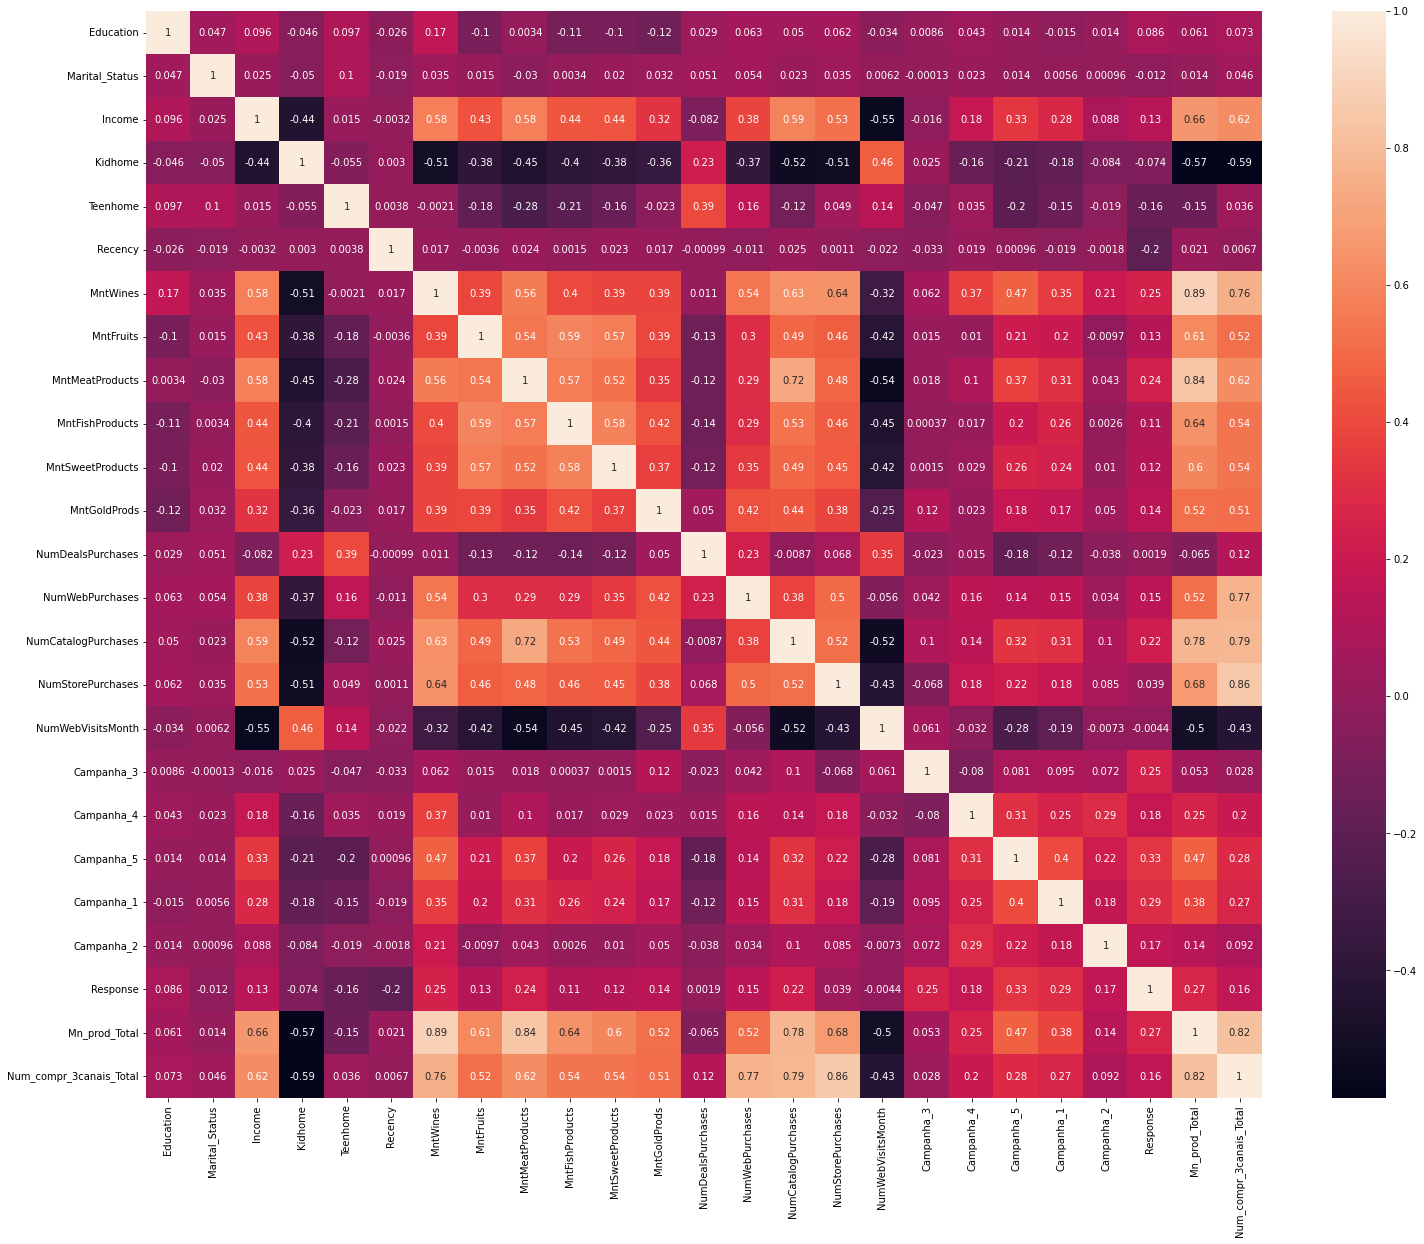

In [ ]:
###f = plt.figure(figsize=(18, 15))
###plt.matshow(df_drop.corr(), fignum=f.number)
###plt.xticks(range(df_drop.select_dtypes(['number']).shape[1]), df_drop.select_dtypes(['number']).columns, fontsize=14, rotation=45)
###plt.yticks(range(df_drop.select_dtypes(['number']).shape[1]), df_drop.select_dtypes(['number']).columns, fontsize=14)
###cb = plt.colorbar()
###cb.ax.tick_params(labelsize=14)
###plt.title('\n Correlation Matrix  \n \n \n \n \n \n', fontsize=16);


corrMatrix = df_drop.corr()
plt.figure(figsize=(25, 20))
sn.heatmap(corrMatrix, annot=True)
plt.show()

##Segment analysis

In [ ]:
Segm = df_drop[
        (df_drop['NumStorePurchases']>0)&
        (df_drop['NumCatalogPurchases']>0)&
        (df_drop['NumWebPurchases']>0)&
        (df_drop['Age_Category']>=3)&
        (df_drop['MntWines']>0)&
        (df_drop['MntMeatProducts']>0)
        ]

In [ ]:
Segm['Education2'] = Segm['Education'].copy()
Segm['Marital_Status2'] = Segm['Marital_Status'].copy()
Segm['Kidhome2'] = Segm['Kidhome'].copy()
Segm['Teenhome2'] = Segm['Teenhome'].copy()

print(Segm.groupby(['Age_Category','Education']).count()['Education2'])
print(Segm.groupby(['Age_Category','Marital_Status']).count()['Marital_Status2'])
print(Segm.groupby(['Age_Category','Kidhome']).count()['Kidhome2'])
print(Segm.groupby(['Age_Category','Teenhome']).count()['Teenhome2'])
print(Segm.groupby(['Age_Category','Teenhome']).median()['Income'])

Age_Category  Education
1             1              NaN
              2              NaN
              3              NaN
              4              NaN
              5              NaN
2             1              NaN
              2              NaN
              3              NaN
              4              NaN
              5              NaN
3             1              5.0
              2            250.0
              3             35.0
              4             95.0
              5            120.0
4             1              2.0
              2            229.0
              3             33.0
              4             76.0
              5             91.0
5             1              1.0
              2             54.0
              3              5.0
              4             36.0
              5             60.0
Name: Education2, dtype: float64
Age_Category  Marital_Status
1             1                   NaN
              2                   NaN
             

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

##Data split

In [ ]:
X = df_drop.drop(columns=['Response'])
y = df_drop['Response']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#X = df_drop.iloc[[:, 0:10],[:, 1:10]]
#y = df_drop.iloc[:, 0]

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##Algoritmo's trainer

###Model 1 Logic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

reg1 = LogisticRegression()
reg1.fit(X_train, y_train) 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Model 2 Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

#Predictions

####Model 1

In [ ]:
reg1.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [ ]:
Prob_reg = reg1.predict_proba(X_test)[:,1]*1000


####Model 2

In [ ]:
rf.predict(X_test)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
Prob_rf = rf.predict_proba(X_test)[:,1]

#Model's Validation

#### Acurancia model 1



In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, reg1.predict(X_test)))

0.8348214285714286


#### Acurancia model 2

In [ ]:
print(accuracy_score(y_test,rf.predict(X_test)))

0.8630952380952381


####F1 model 1

In [ ]:
from sklearn.metrics import classification_report

target_names = ['No Acept', 'Acept']
print(classification_report(y_test, reg1.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

    No Acept       0.85      0.97      0.91       558
       Acept       0.54      0.17      0.26       114

    accuracy                           0.83       672
   macro avg       0.70      0.57      0.58       672
weighted avg       0.80      0.83      0.80       672



####F1 model 2

In [ ]:
print(classification_report(y_test, rf.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

    No Acept       0.88      0.97      0.92       558
       Acept       0.71      0.32      0.45       114

    accuracy                           0.86       672
   macro avg       0.79      0.65      0.68       672
weighted avg       0.85      0.86      0.84       672



##Curva ROC

####Model 1

In [ ]:
from sklearn.metrics import roc_curve
fpr_mod1, tpr_mod1,thresholds_mod1 = roc_curve(y_test,Prob_reg)


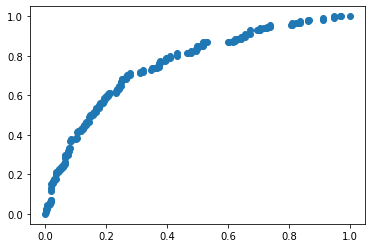

In [ ]:

plt.scatter(fpr_mod1, tpr_mod1)
plt.show()

####Model 2

In [ ]:
fpr_mod2, tpr_mod2,thresholds_mod2 = roc_curve(y_test,Prob_rf)


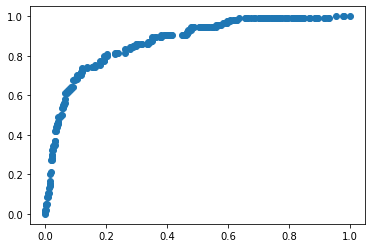

In [ ]:
plt.scatter(fpr_mod2, tpr_mod2)
plt.show()

##Determination AUC

####Model 1

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,Prob_reg)

0.7608155693894234

####Model 2

In [ ]:
roc_auc_score(y_test,Prob_rf)

0.8730899830220713

##Normalization the features for use KNeighbors 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
normalizador = MinMaxScaler(feature_range = (0,1))
X_normal = normalizador.fit_transform(X)

####Split for Kneighbors

In [ ]:
X_Kntrain, X_Kntest, y_Kntrain,  y_Kntest = train_test_split(X_normal,y,test_size = 0.3,random_state = 42)

####Model 3 Kneighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 11)
KNN.fit(X_Kntrain, y_Kntrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [ ]:
KNN.predict(X_Kntest)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
Prob_KNN = KNN.predict_proba(X_Kntest)[:,1]*1000
##rf.predict_proba(X_test)[:,1]

In [ ]:
Prob_KNN

array([ 90.90909091,   0.        , 363.63636364, 363.63636364,
       272.72727273,   0.        , 181.81818182, 181.81818182,
        90.90909091,   0.        , 636.36363636,   0.        ,
       181.81818182, 272.72727273,   0.        ,   0.        ,
         0.        ,   0.        , 181.81818182,  90.90909091,
         0.        ,  90.90909091, 181.81818182,  90.90909091,
         0.        ,  90.90909091,   0.        , 272.72727273,
       545.45454545,   0.        ,  90.90909091, 454.54545455,
         0.        ,  90.90909091,   0.        ,  90.90909091,
         0.        , 272.72727273, 727.27272727,  90.90909091,
       636.36363636,   0.        ,  90.90909091,   0.        ,
         0.        ,  90.90909091,   0.        ,   0.        ,
         0.        , 181.81818182,  90.90909091,   0.        ,
       272.72727273,   0.        ,   0.        ,  90.90909091,
        90.90909091,   0.        ,  90.90909091, 181.81818182,
         0.        ,   0.        ,   0.        ,   0.  

In [ ]:
print(accuracy_score(y_Kntest, KNN.predict(X_Kntest)))
##TAMBEM SE PODE UTILIZAR PARA ACURACIAS = modelo.score(X_Kntest,y_Kntest ) 

0.8526785714285714


In [ ]:
print(classification_report(y_Kntest, KNN.predict(X_Kntest), target_names=target_names))

              precision    recall  f1-score   support

    No Acept       0.86      0.98      0.92       558
       Acept       0.70      0.23      0.34       114

    accuracy                           0.85       672
   macro avg       0.78      0.60      0.63       672
weighted avg       0.83      0.85      0.82       672



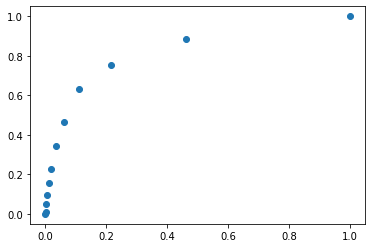

In [ ]:
fpr_mod3, tpr_mod3,thresholds_mod3 = roc_curve(y_Kntest,Prob_KNN)
plt.scatter(fpr_mod3, tpr_mod3)
plt.show()


In [ ]:
roc_auc_score(y_test,Prob_KNN)

0.8265578821605986

###KNN com ajuste de parâmetros

In [ ]:
from sklearn.model_selection import GridSearchCV


####Definimos os valores que serão testados 

In [ ]:
valores_K = np.array([3, 5, 7, 9, 11])
calculo_distancia =['minkowski','chebyshev']
valores_p = np.array([1,2,3,4])
valores_grid = {'n_neighbors':valores_K, 'metric':calculo_distancia, 'p':valores_p}

####Criação do modelo

In [ ]:
modelo_ajustado_KNN = KNeighborsClassifier()

####Criando os grids

In [ ]:
gridKN = GridSearchCV(estimator = modelo_ajustado_KNN, param_grid = valores_grid, cv=5)


In [ ]:
##gridKN.fit(X_Kntrain, y_Kntrain)
gridKN.fit(X_Kntrain, y_Kntrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['minkowski', 'chebyshev'],
                         'n_neighbors': array([ 3,  5,  7,  9, 11]),
                         'p': array([1, 2, 3, 4])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print('Melhor acerácia:', gridKN.best_score_)
print('Melhor K:', gridKN.best_estimator_.n_neighbors)
print('Melhor distância:', gridKN.best_estimator_.metric)
print('Melhor p:', gridKN.best_estimator_.p)

Melhor acerácia: 0.8722044728434504
Melhor K: 11
Melhor distância: minkowski
Melhor p: 1


In [ ]:
gridKN.predict(X_Kntest)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
Grid_KNN = gridKN.predict_proba(X_Kntest)[:,1]*1000

In [ ]:
print(accuracy_score(y_Kntest, gridKN.predict(X_Kntest)))

0.8586309523809523


In [ ]:
print(classification_report(y_Kntest, gridKN.predict(X_Kntest), target_names=target_names))

              precision    recall  f1-score   support

    No Acept       0.86      0.99      0.92       558
       Acept       0.77      0.24      0.36       114

    accuracy                           0.86       672
   macro avg       0.82      0.61      0.64       672
weighted avg       0.85      0.86      0.83       672



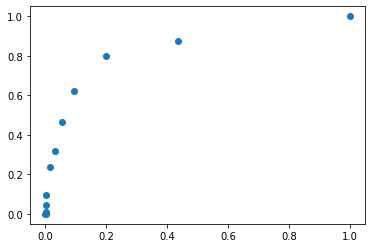

In [ ]:
fpr_mod4, tpr_mod4,thresholds_mod4 = roc_curve(y_Kntest,Grid_KNN)
plt.scatter(fpr_mod4, tpr_mod4)
plt.show()


In [ ]:
roc_auc_score(y_test,Grid_KNN)

0.8395821543105074

#Curva ROC comparation  of both models

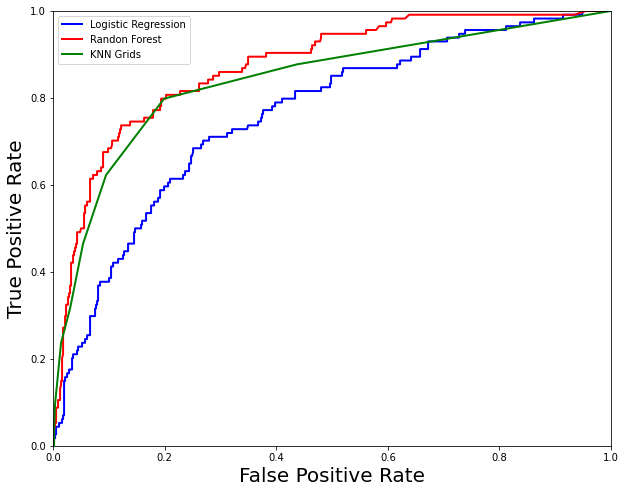

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(fpr_mod1, tpr_mod1, linestyle='-', color="blue", linewidth=2,label = 'Logistic Regression')
plt.plot(fpr_mod2, tpr_mod2, linestyle='-', color="red", linewidth=2,label = 'Randon Forest')
plt.plot(fpr_mod4, tpr_mod4, linestyle='-', color="green", linewidth=2,label = 'KNN Grids')
##plt.axhline(y=p, color='r', linestyle='--', label = 'Valor teorico')
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend()
plt.show(True) 

Com este grafico consegimos escolher o melhor modelo para ser utilizado, el modelo preditivo escolhido esta feito como Random Forest otendo una acuracia del modelo de 87%

#Insight

####Ticket promedio por compra

In [ ]:
((df_drop.loc[:,['Mn_prod_Total']].sum(axis=1)).sum()/
 (df_drop.loc[:,['Num_compr_3canais_Total']].sum(axis=1)).sum()).round(2)

48.29

###Ticket promedio por cliente

In [ ]:
((df_drop.loc[:,['Mn_prod_Total']].sum(axis=1)).sum()/
 len(df_drop)).round(2)

605.74

###Quantidade de compras tendo ou não filhos ou jovens em casa

In [ ]:
df_drop.groupby(['Kidhome','Teenhome']).sum()['Mn_prod_Total']/df_drop['Mn_prod_Total'].sum()*100

Kidhome  Teenhome
0        0           51.938677
         1           33.922119
1        0            7.125135
         1            7.014069
Name: Mn_prod_Total, dtype: float64

#A conclução do caso
Depois de fazer o analize descriptivo, se detetó que a grande parte de os clientes compran mediante los tres canais en um mismo periodo de tempo, eso poderia demostrar certa fidelización, ademais se detectou que o canal Catalogo é el menos utilizado pelos clientes. Por outro lado, se analizou que o producto com mayor proporção de vendas é o vinho, abarcando um 50% del total de productos; em este mesmo contexto se analizou que o segundo produto com mas volumen de vendas é a carne, com um 27%.
Em cuanto ao modelo que se precisa para clasificar a los clientes se realizo um teste com Regeção logistica, Randon Forest e K-neighbor, tendo um melhor resultado de validação de modelo com o Random forest e sendo comprobado empleando a Curva ROC a través do AUC. 
